In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red"><b>ch3. 분류분석</b></font>
# 1절. 분류분석 개요
## 1-1 분류분석이란? 
- 타겟변수가 categorical인 분석
    * ex. 고객등급예측, 휴면고객예측, 상품구매예측, 보험사기자예측
    * 수업ex. mnist 숫자데이터분류 예측, iris분류예측, 와인등급예측, 질병예측
    
- sklearning 패키지 : 예제데이터셋, 전처리, 머신러닝 모형 등의 제공

## 1-2 샘플용 데이터 셋 접근

### load 계열(패키지 내에 데이터 있음)
    - load_iris(), load_boston(), load_diabetes()...
### fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터뉴스 말뭉치)
### make 계열(가상의 데이터 생성)
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성
    - make_blobs() : 군집분석용 데이터 생성(타겟변수x)
    
  

In [2]:
# load 계열(패키지 내에 데이터 있음)
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# mnist load
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

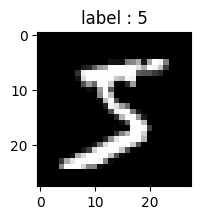

In [3]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title("label : {}".format(y_train[0]))
plt.show()

In [4]:
# fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
from sklearn.datasets import fetch_openml
# mnist fetch : mnist, iris, boston, fashon-mnist ....
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False, parser="auto")
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

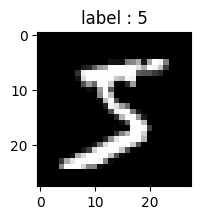

In [5]:
X = X.reshape(-1, 28,28)
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X[0], cmap='gray')
plt.title('label : {}'.format(y[0]))
plt.show()

# 2절. 분류분석의 종류
- predict()
## 2-1 확률적 모형
    - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
    - predict_proba() : 각 분류 클래스별 확률을 알려줌(일부의 판별함수 모형에 있긴 함)
    - predict_log_proba() : 확률의 로그값을 알려줌
    
### 1) 확률적 생성 모형
        - 각 클래스별 특징 데이터 확률분포 추정(베이즈 정리를 사용). 소량의 데이터로도 작동
        - ex. Quadratic Discriminant Analysis, 나이브 베이지안
        
### 2) 확률적 판별 모형
        - 확률을 계산하는 함수 이용
        - ex. 의사결정나무, 로지스틱 회귀

## 2-2 판별함수 모형
    - 주어진 데이터를 클래스에 따라 서로 다른 영역으로 나누는 경계면을 찾은 후, 
    - 이 경계면으로부터 어느 위치에 있는지를 계산하는 판별함수를 이용
    - decision_function()
    - ex. 퍼셉트론, 서포트벡터머신, MLP(신경망)
    
=> RandomForest, LGBM, XGBoost, CatBoost등의 앙상블 모형이 더 많이 쓰임

# 3절 분류모형1. 확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산

## 3-1 QDA(Quadratic Discriminant Analysis)
- X가 연속형(실수)이면서 정규분포라고 가정함

In [6]:
# 샘플 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, # 독립변수 갯수
                          n_informative=2, # 타겟변수에 영향을 주는 독립변수 갯수
                          n_redundant=0, # 타겟변수에 영향을 안 주는 독립변수
                          n_clusters_per_class=1, # 클래스 내 서브그룹수
                          n_classes=2, # 타겟변수 class 수
                          n_samples=100, # 데이터 갯수(행수. 기본값)
                          random_state=9) # seed값
X.shape, y.shape

((100, 2), (100,))

In [7]:
import numpy as np
np.unique(y)

array([0, 1])

In [8]:
y.mean()

0.5

In [9]:
# y=1인 데이터
X[y==1].shape

(50, 2)

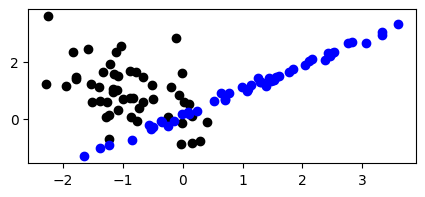

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.scatter(X[y==0,0], X[y==0,1], c='k')
plt.scatter(X[y==1,0], X[y==1,1], c='b')

In [11]:
# (0,0) 대칭 구조
X[y==1] = -X[y==0]

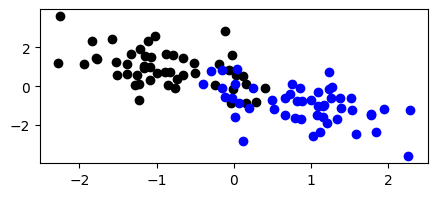

In [12]:
plt.figure(figsize=(5,2))
plt.scatter(X[y==0,0], X[y==0,1], c='k')
plt.scatter(X[y==1,0], X[y==1,1], c='b')

In [13]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [14]:
x = [[5,5]] # 2차원 데이터 predict
model.predict(x)[0]

1

In [15]:
p = model.predict_proba(x)
print(p) # 0으로 분류될 확률, 1로 분류될 확률

[[8.84215536e-06 9.99991158e-01]]


In [16]:
model.classes_ # 분류될 내용

array([0, 1])

In [17]:
import pandas as pd
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


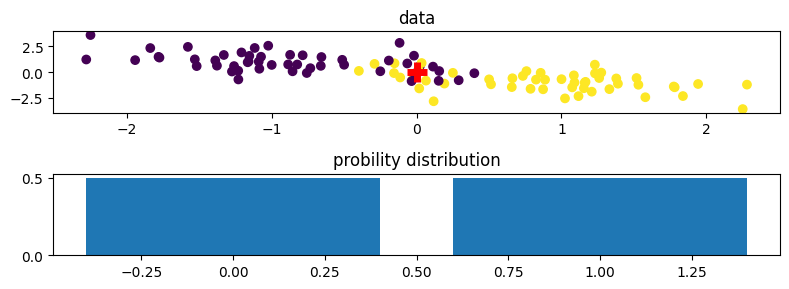

In [18]:
x = [[0,0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211) # 2행1열로 plt그래프 중 첫번째 그래프 (2, 1, 1)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='+', lw=5)
plt.title('data')
plt.subplot(212) # 2행1열로 plt그래프 중 두번째 그래프 (2, 1, 2)
plt.bar(model.classes_, p[0])
plt.title('probility distribution')

plt.tight_layout()
plt.show()

In [19]:
model.predict(x)

array([0])

## 3-2 나이브베이지안 모형

In [20]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values # 범주형(문자) - 라벨인코딩 없이 적용
# 모형생성
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y) # 학습데이터는 numpy 배열로

MultinomialNB()

In [21]:
test_x = np.array([[5.1,3.5,1.4,0.2]]) # X.loc[0]

print('test_X의 예측 :', model.predict(test_x))
print(model.classes_)
print(model.predict_proba(test_x))

test_X의 예측 : ['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


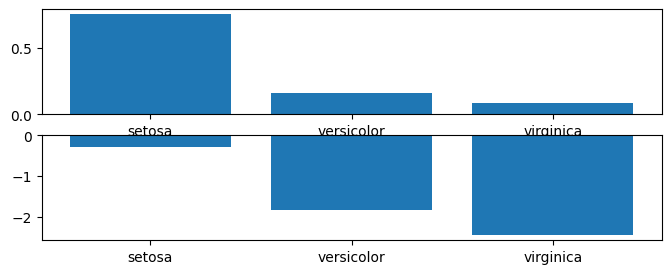

In [22]:
test_x = np.array([[5.1,3.5,1.4,0.2]]) # X.loc[0]
plt.figure(figsize=(8,3))
plt.subplot(2, 1, 1)
plt.bar(model.classes_, model.predict_proba(test_x)[0])
plt.subplot(2, 1, 2)
plt.bar(model.classes_, model.predict_log_proba(test_x)[0]) # 로그 확률값
plt.show()

# 4절 분류모형2. 확률적 판별모형
## 4-1 로지스틱 회귀분석

In [23]:
# 데이터
X, y = make_classification(n_features=1, # 독립변수
                          n_redundant=0, # 타겟변수에 영향을 미치지 않는 독립변수
                          n_informative=1, #타겟변수에 영향을 미치는 독립변수
                          n_classes=2,   # 타겟변수의 class수 (0,1)
                          n_clusters_per_class=1, 
                          n_samples=100, #데이터 수
                          random_state=1)
X.shape, y.shape

((100, 1), (100,))

In [24]:
np.unique(y), y.mean()

(array([0, 1]), 0.5)

In [25]:
# 모형 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [26]:
import numpy as np
xx = np.linspace(-3, 3, 100) # -3부터 3까지 같은 간격의 데이터 100개
# xx의 행축 증가
test_x = xx.reshape(-1, 1)
test_x = xx[:, np.newaxis]
test_x = np.expand_dims(xx, axis=1)
test_x = xx[:, None]
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)
prob0 = prob[:, 0]  # 0으로 분류될 확률
prob1 = prob[:, 1] # 1로 분류될 확률

<BarContainer object of 2 artists>

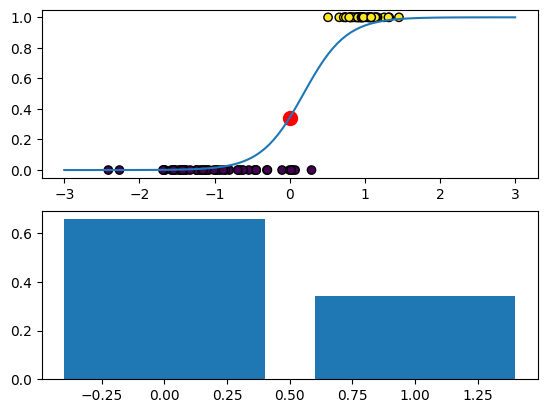

In [27]:
plt.subplot(211)
x = [[0]]
prob_x = model.predict_proba(x)
plt.scatter(X, y, c=y, edgecolors='k')
plt.plot(xx, prob1)
plt.scatter(x[0][0], prob_x[0][1], c='r', s=100)
plt.subplot(212)
plt.bar(model.classes_, prob_x[0])

## 4.2 의사결정나무
- **★ 종속변수에 영향을 주는 독립변수의 범주를 찾는 목적**

In [28]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:] # 2번째, 3번째 열만
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
print(feature_names)

# 모형 생성
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="entropy", # 분류품질 기준
                                 max_depth=1,
                                 random_state=0)
dt_model.fit(X, y) # depth가 1이라 성능이 좋지 않을 예정
print(X[130])
test_x = [[6.1, 1.9]]
print('예측값 :', dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

['petal length', 'petal width']
[6.1 1.9]
예측값 : [1]
[0 1 2]
[[0.  0.5 0.5]]


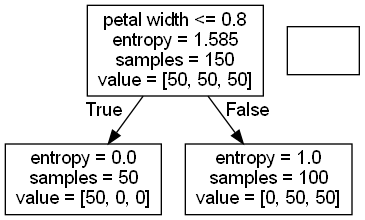

In [29]:
# 분류모형의 시각화
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)

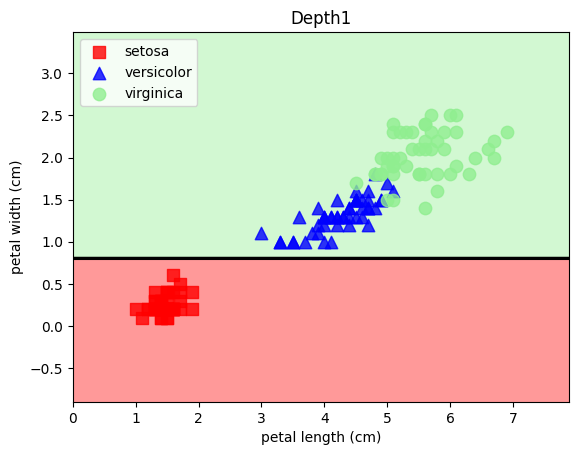

In [30]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z
plot_decision_regions(X, y, dt_model, "Depth1")
plt.show()

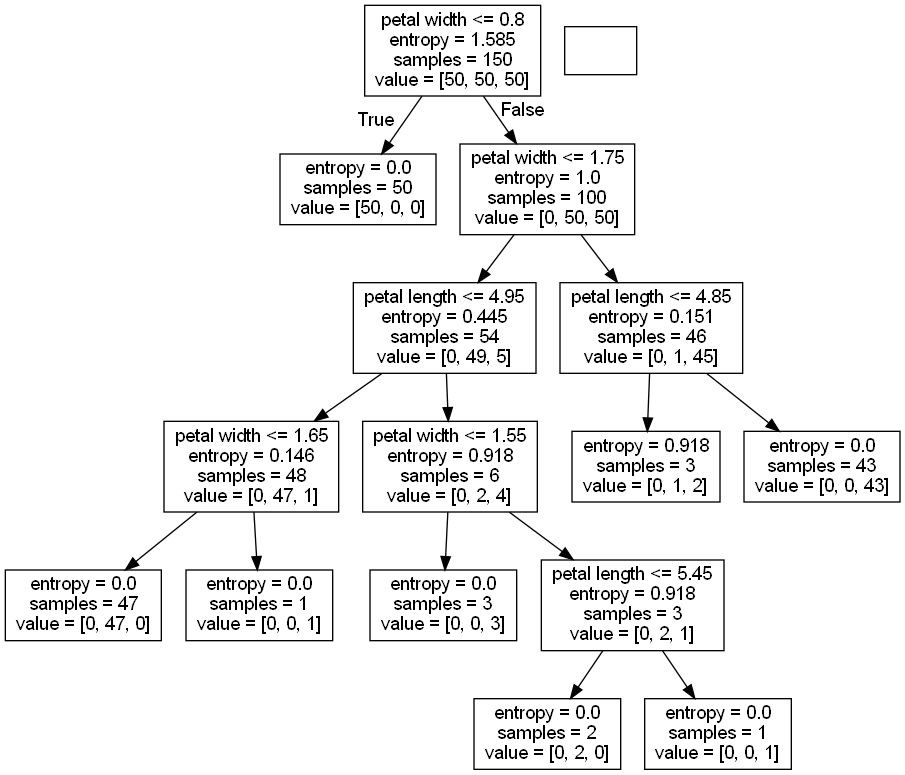

In [31]:
dt_model5 = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=15,
                                  random_state=0)
dt_model5.fit(X, y)
draw_decision_tree(dt_model5, feature_names=feature_names)

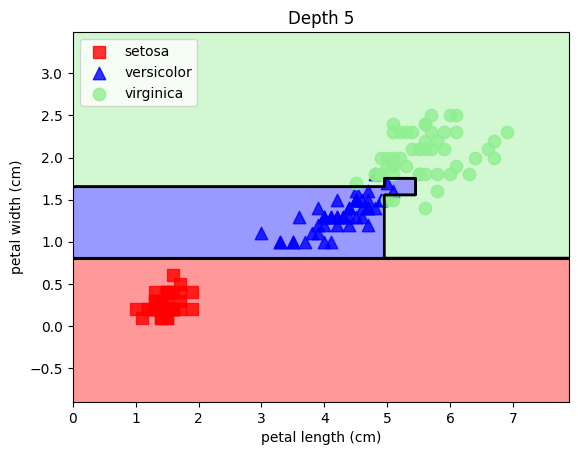

In [32]:
plot_decision_regions(X, y, dt_model5, "Depth 5")
plt.show()

In [33]:
pred = dt_model5.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절. 분류모형3. 판별함수 모형
- SVM, 퍼셉트론, MLP(predict_proba()있음), ...
- predict_prob대신 decision_function()
## 5.1 SVM의 SVC

In [34]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
idx = pd.Series(iris.target).isin([0, 2])
print(idx.tolist())

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [35]:
X = iris.data[idx]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)

SVC()

In [37]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [38]:
X[0]
x = [[5.1, 3.5, 1.4, 0.2]]
model.predict(x)
model.decision_function(x)

array([-1.14828042])

## 5.2 퍼셉트론

In [39]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, # 학습횟수 epoch 100회
                  eta0=0.1, #learning rate 
                  random_state=1).fit(X, y)

In [40]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [41]:
x = [[3.1, 1.5, 1.2, 0.1]]
pred = model.predict(x)
df   = model.decision_function(x)
print('예측값 :', pred)
print('판별함수 결과 :', df)

예측값 : [2]
판별함수 결과 : [0.122]


## 5.3 다중퍼셉트론(인공신경망)
- predict / decision_function / predict_proba / predict_log_proba

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 30),
                   max_iter=500,
                   activation='relu')
mlp.fit(X, y)
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


# 6절. 분류모형 성능평가
- 혼동행렬(교차표)
- score함수 : accuracy, recall, precision, f1_score, fbeta_score
- ROC커브 -> roc커브 영역 확인
- ex. 두 모형이 혼동행렬이 같은 경우
## 6-1 혼동행렬(교차표)

In [43]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2] # 실제값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1] # 예측값
# 혼동행렬
from sklearn.metrics import confusion_matrix # 그룹이 2개일 때
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [44]:
# 교차표
pd.crosstab(y_true, y_pred, colnames=['예측값'], rownames=['실제값']) # 그룹이 3개 이상일 때

예측값,0,1,2
실제값,,,
0,2,1,0
1,1,2,0
2,0,2,1


## 6-2 . 혼동행렬을 이용한 평가
- 각종 score() 함수

In [45]:
result = pd.read_csv('data/model_result.csv') # 보험사기자 실제값과 예측값
result.sample(3)

,CUST_ID,y_true,y_pred
1427,17739,0,0
767,9330,0,0
1252,15725,0,0


In [46]:
result.isnull().sum() # 결측치 갯수

CUST_ID    0
y_true     0
y_pred     0
dtype: int64

In [47]:
result.shape

(1793, 3)

In [48]:
result['y_true'].value_counts()

0    1635
1     158
Name: y_true, dtype: int64

In [49]:
pd.crosstab(result.y_true, 
            result.y_pred,
            margins=True,  # 합계 출력
           colnames=['예측값'],
           rownames=['실제값'])

예측값,0,1,All
실제값,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, fbeta_score
# 정확도 : 전체중에서 맞게 예측한 확률
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [51]:
# 정밀도(precision) : positive로 예측한 것 중에 맞게 예측한 확률
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [52]:
# 재현율(recall) : 실제 positive 중 맞게 예측한 확률
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [53]:
# 특이도(specificity) : 실제 negative 중 맞게 예측한 확률
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [54]:
# 위양성율(fprate) : FN / (TN+FP) ; 실제 negative인데 positive로 예측한 확률
# 함수 없음

In [55]:
# f1 score : recall과 precision 조화평균
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [56]:
# beta=1 : f1_score - recall과 precision의 비중을 같게
fbeta_score(result.y_true, result.y_pred, beta=1)

0.5992217898832685

In [57]:
# beta=2 : f1_score - recall의 가중치를 높게 precision의 비중을 낮게
fbeta_score(result.y_true, result.y_pred, beta=2)

0.5266757865937073

In [58]:
# beta=0.5 : f1_score - recall의 가중치를 낮게 precision의 비중을 높게
fbeta_score(result.y_true, result.y_pred, beta=0.5)

0.6949458483754513

## 6-3 ROC커브를 이용한 성능 비교
- ROC그래프의 가로축 위양성율(fprate : False Positive rate), 세로축 racall값

In [59]:
from sklearn.datasets import make_classification
X, y = make_classification(weights=[0.95,0.05], #0:95%, 1:5%
                          n_samples=1000,
                          random_state=5)
X.shape, y.shape

((1000, 20), (1000,))

In [60]:
np.unique(y), y.mean()

(array([0, 1]), 0.057)

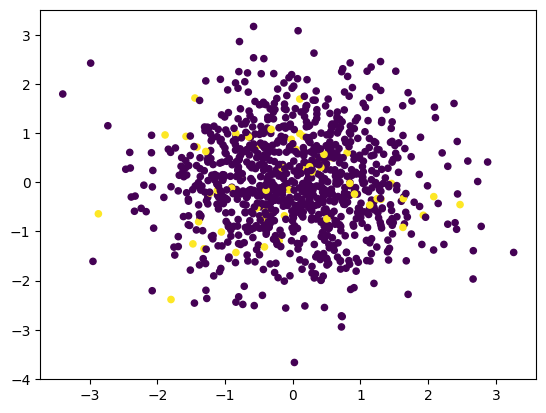

In [61]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, s=20)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

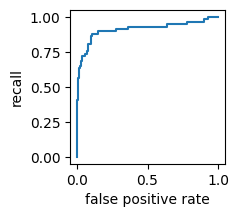

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y, model.decision_function(X))
plt.figure(figsize=(2,2))
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('recall')
plt.show()

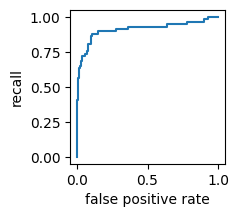

In [64]:
y_proba = model.predict_proba(X)[:,1]
fpr1, tpr1, thr1 = roc_curve(y, y_proba)
plt.figure(figsize=(2,2))
plt.plot(fpr1, tpr1)
plt.xlabel('false positive rate')
plt.ylabel('recall')
plt.show()

## 6-4 두 모형의 혼동행렬이 같은 경우(roc_curve사용)

In [65]:
from sklearn.datasets import make_classification
X, y = make_classification(weights=[0.95,0.05], #0:95%, 1:5%
                          n_samples=1000,
                          random_state=5)

In [68]:
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X, y)
model2 = SVC(
            gamma=0.0001, # 작을수록 경제면이 부드러운 곡선
            C = 3000,     # 오차허용
            probability=True).fit(X, y)

In [69]:
y_hat1 = model1.predict(X)
y_hat2 = model2.predict(X)

In [70]:
display(pd.crosstab(y, y_hat1))
display(pd.crosstab(y, y_hat2))

col_0,0,1
row_0,,
0,940,3
1,30,27


col_0,0,1
row_0,,
0,940,3
1,30,27


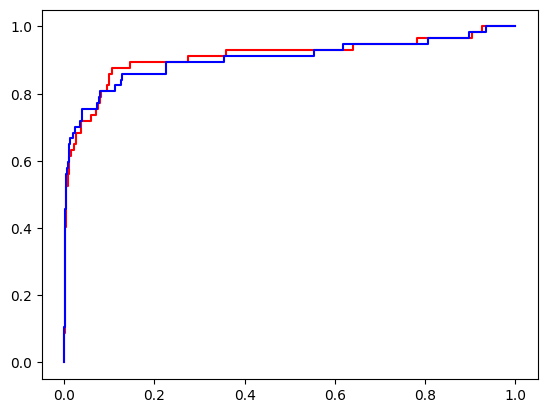

In [71]:
# 혼동행렬이 같으므로 모든 score값이 같음
# roc 커브로 두 모델 성능 비교
fpr1, tpr1, th1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, th2 = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1, tpr1, color='r')
plt.plot(fpr2, tpr2, color='b')
plt.show()

In [72]:
# AUC(Area Under Curve) : roc커브 아랫부분의 영역
# AUC = 1 : 완벽한 모델
# AUC < 0.5 : 최악의 모델
# AUC = 0.5 : 동전던지기와 일치
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)